## Business Case: Aerofit - Descriptive Statistics & Probability


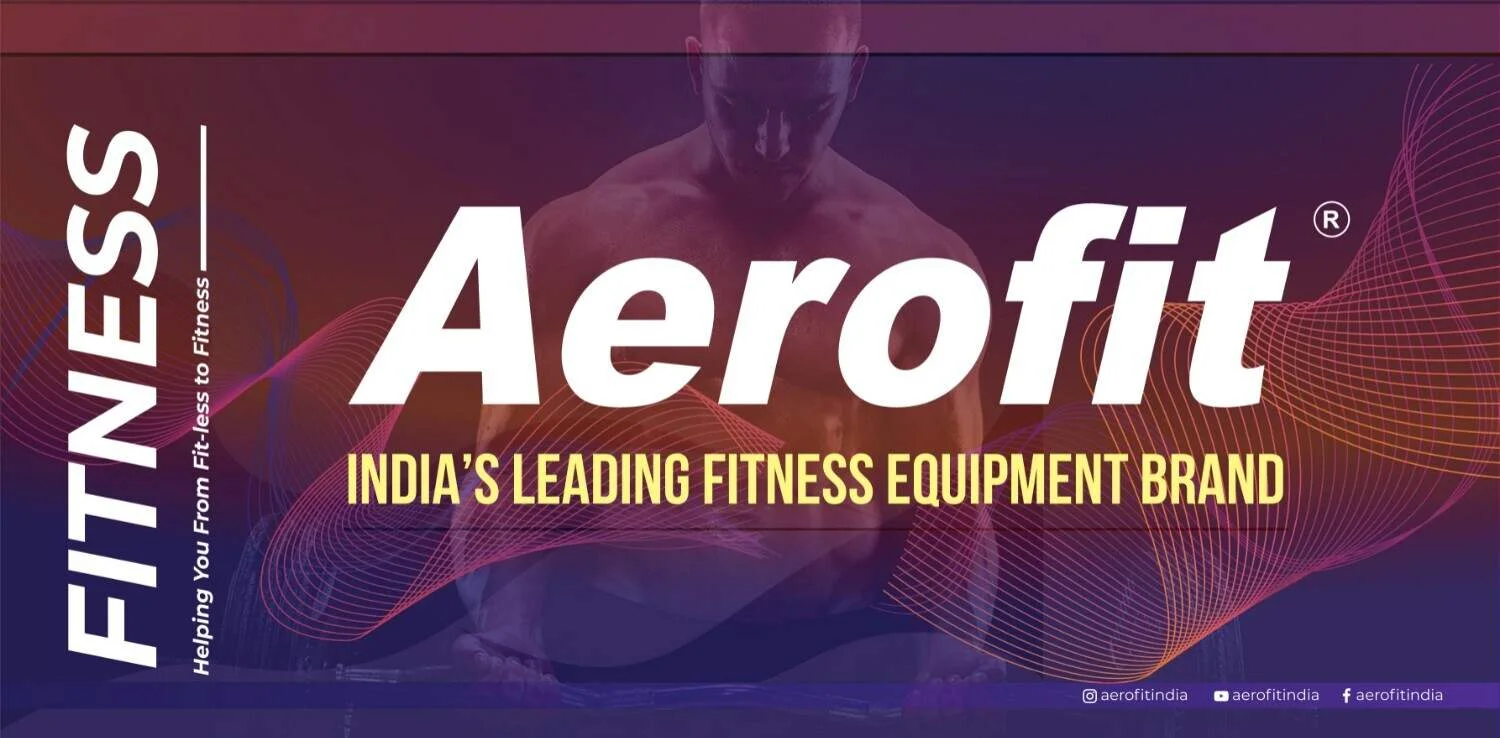

### **About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Columns info:-**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

*   Product Purchased: KP281, KP481, or KP781
*   Age: In years
*   Education: In year
*   MaritalStatus: Single or partnered
*   Usage: The average number of times the customer plans to use the treadmill each week.
*   Income: Annual income (in dollars)
*   Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
*   Miles: The average number of miles the customer expects to walk/run each week


**Product Portfolio:**

The KP281 is an entry-level treadmill that sells for 1,500 dollars.
The KP481 is for mid-level runners that sell for 1,750 dollars.
The KP781 treadmill is having advanced features that sell for 2,500 dollars.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the data
aerofit_df = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
# Length of the dataset
len(aerofit_df)

180

In [ ]:
#Reading the data
aerofit_df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


**Shape of the dataFrame**

In [ ]:

aerofit_df.shape

(180, 9)

In [ ]:
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Data types of all Attributes in DataFrame**

In [ ]:

aerofit_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Conversion of Categorical Attributes to Category

In [ ]:
aerofit_df['Product'] = aerofit_df['Product'].astype('category')
aerofit_df['Gender'] = aerofit_df["Gender"].astype('category')
aerofit_df['MaritalStatus'] = aerofit_df['MaritalStatus'].astype('category')

In [ ]:
aerofit_df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [ ]:
# Checking Skewness
aerofit_df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

Checking for Null Values

In [ ]:
aerofit_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Checking unique values in our data

In [ ]:
for i in aerofit_df.columns:
  print(i,':',aerofit_df[i].nunique())


Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


**Statistical Summary of DataFrame**

In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
aerofit_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations from Statistical Summary**


*   There are no missing values in the data.
*   There are 3 unique products in the data set.
*   KP281 is the most frequent product.
*   Out of 180 data points 104 are Males and 76 are Females.
*   Most people are having 16 years of education. 75% of people are having education <= 16yrs.
*   Minimum and maximum age is 18 and 50, mean is 28.79 and 75% of people have age <=33yrs.
*   Standard Deviation for Income and Miles is very high. These variables might have the outliers in it.












In [ ]:
#Checking for duplicate values

In [ ]:
aerofit_df.duplicated(subset=None,keep='first').sum()

0

No duplicate value in the dataset

### 2. Non-Graphical Analysis: Value counts and Unique attributes

### Value Counts

In [ ]:
#checking value counts of each product
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
#Checking Value Counts for all the columns.

In [ ]:
for i in aerofit_df.columns:
  print(i)
  print(aerofit_df[i].value_counts())
  print('  ')
  print("**********")
  print('  ')

Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
  
**********
  
Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
  
**********
  
Gender
Male      104
Female     76
Name: Gender, dtype: int64
  
**********
  
Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
  
**********
  
MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
  
**********
  
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
  
**********
  
Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
  
**********
  
Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65

### Unique Attributes

In [ ]:
for i in aerofit_df.columns:
  print(i,':')
  print(aerofit_df[i].unique())
  print("")
  print('********')
  print("")

Product :
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

********

Age :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

********

Gender :
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

********

Education :
[14 15 12 13 16 18 20 21]

********

MaritalStatus :
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

********

Usage :
[3 2 4 5 6 7]

********

Fitness :
[4 3 2 1 5]

********

Income :
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

********

Miles :
[112  75  66  85 

In [ ]:
#Checking for unique values
for i in aerofit_df.columns:
  print(i,':',aerofit_df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


### 3. Visual Analysis- Univariate & Bivariate

### Univariate Analysis



*   Understanding the distribution of the data for the quantitative attributes.

1.   Age
2.   Education
1.   Usage
1.   Fitness
2.   Income
6.   Miles








1. Countinous Variables:

Dist Plot

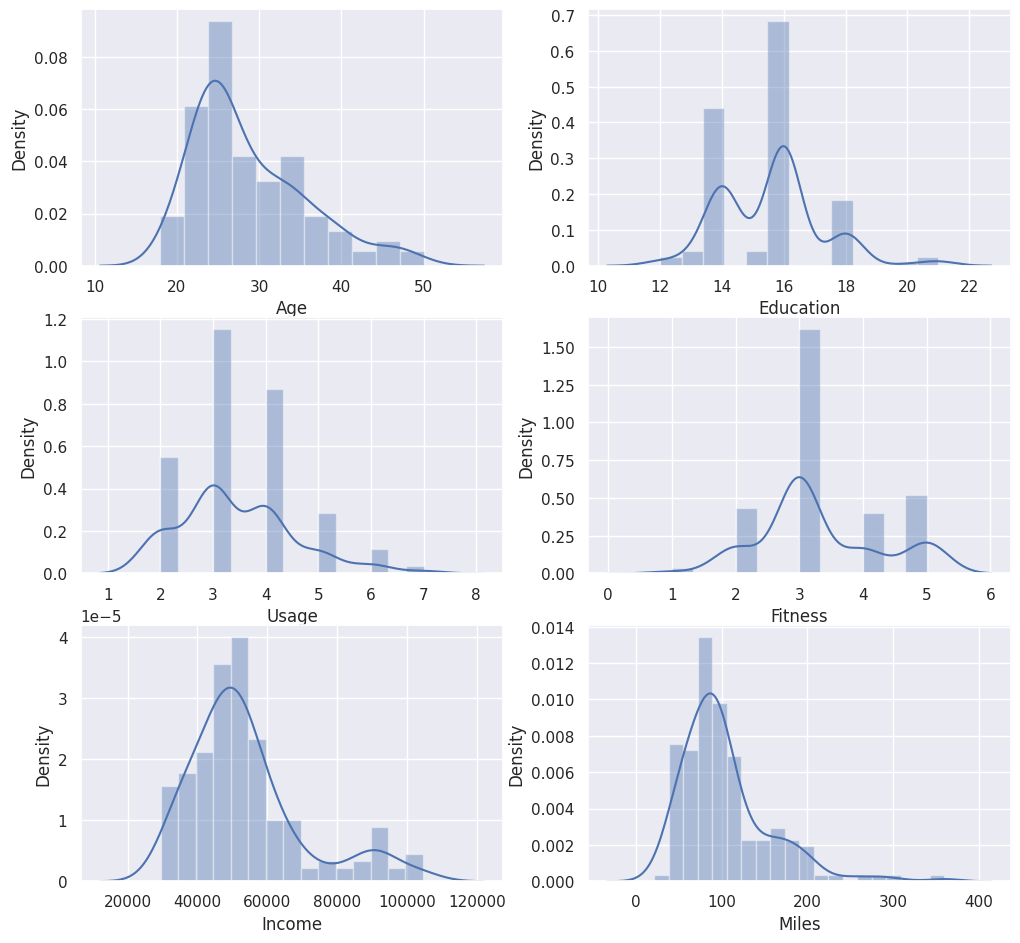

In [ ]:
fig,axis= plt.subplots(nrows=3, ncols=2, figsize=(12,8))
fig.subplots_adjust(top=1.2)

sns.distplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(aerofit_df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(aerofit_df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(aerofit_df['Income'], kde=True, ax=axis[2,0])
sns.distplot(aerofit_df['Miles'], kde=True, ax=axis[2,1])

plt.show()

**Observations**


*   Both Miles and Income have significant outliers based on the above distribution.
*   Also Miles and Income are "right-skewed distribution" which means the mass of distribution is concentrated on the left of the figure.

*   Customer with fitness level 3 buy major chunk of treadmills.
*   Majority of people using treadmill is between the age range 20-35 years.

*   Majority of customers fall within the $ 40,000 - $ 60,000 income range.








**Count** **Plot**

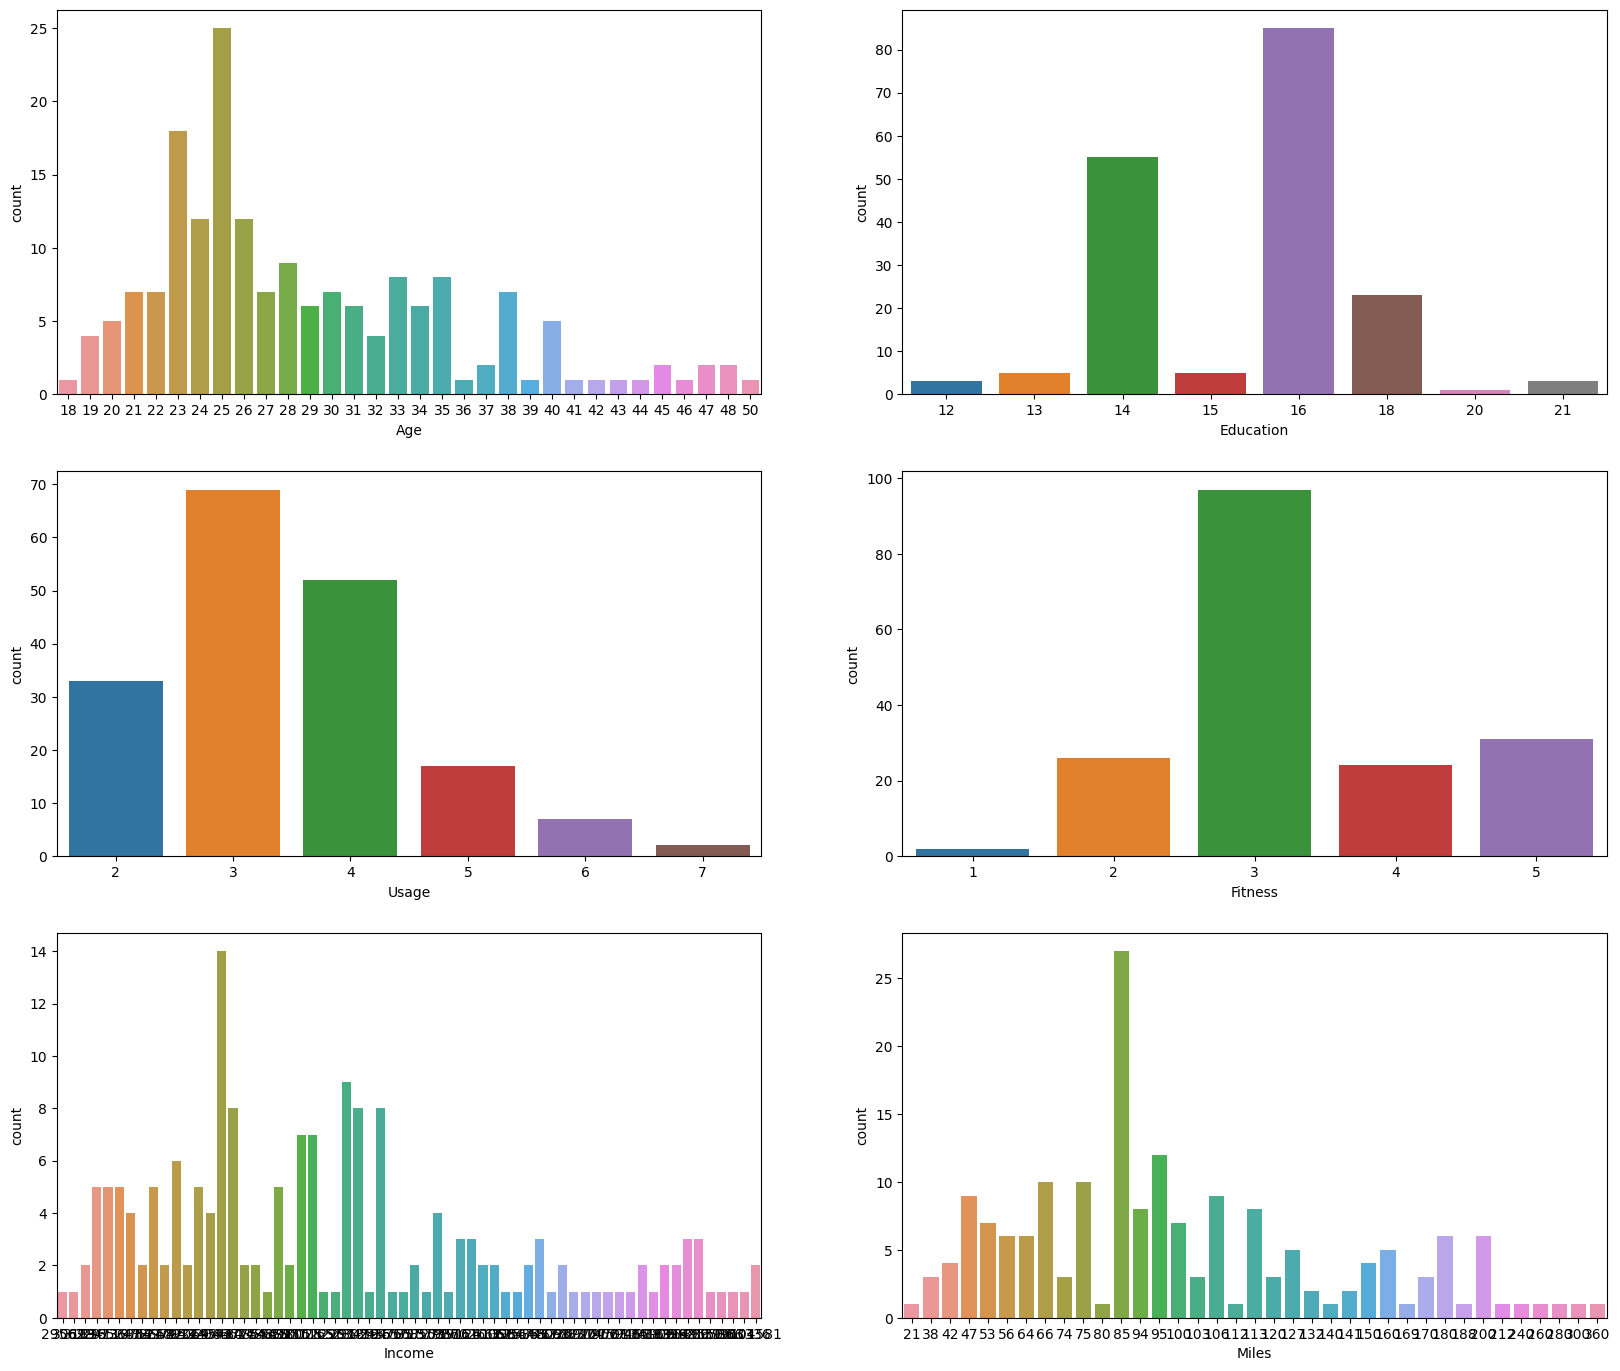

In [ ]:
fig,axis=plt.subplots(nrows=3,ncols=2, figsize=(20,12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=aerofit_df, x='Usage', ax=axis[1,0])
sns.countplot(data=aerofit_df, x='Fitness', ax=axis[1,1])
sns.countplot(data=aerofit_df, x='Income', ax=axis[2,0])
sns.countplot(data=aerofit_df, x='Miles', ax=axis[2,1])
sns.countplot(data=aerofit_df, x='Age', ax=axis[0,0])
sns.countplot(data=aerofit_df, x='Education', ax=axis[0,1])

plt.show()

**Observations:**


*   Young people at age 20-35 are more conscious about health and are using treadmill more than old people
*   The most frequent users are those who use treadmill 3 to 4 times

*   Most of people have average fit with rating 3 are the most frequent user of treadmills.
*   people with total education years 16 are the most frequent users.





**Histplot**

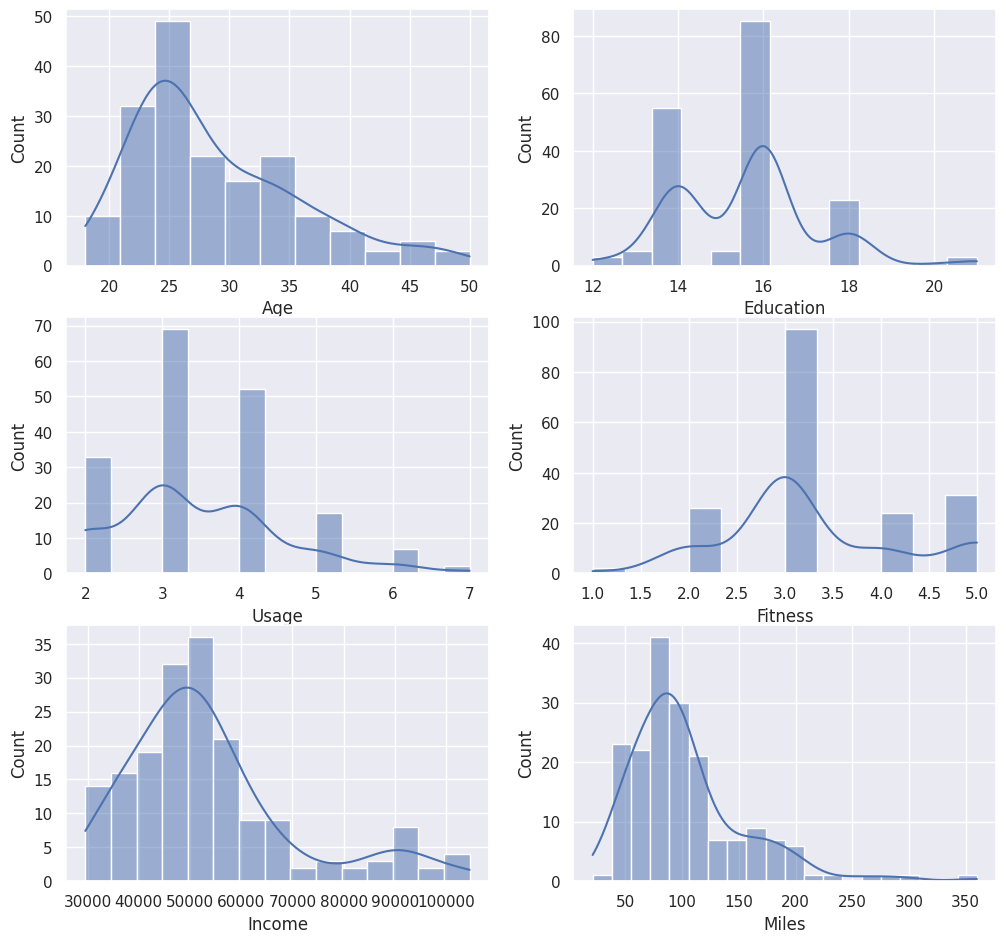

In [ ]:
fig, axis= plt.subplots(nrows=3, ncols=2, figsize=(12,8))
fig.subplots_adjust(top=1.2)

sns.histplot(data=aerofit_df, x='Age', kde=True, ax=axis[0,0])
sns.histplot(data=aerofit_df, x='Education', kde=True, ax=axis[0,1])
sns.histplot(data=aerofit_df, x='Usage', kde=True, ax=axis[1,0])
sns.histplot(data=aerofit_df, x='Fitness', kde=True, ax=axis[1,1])
sns.histplot(data=aerofit_df, x='Income', kde=True, ax=axis[2,0])
sns.histplot(data=aerofit_df, x='Miles', kde=True, ax=axis[2,1])
plt.show()

### 2. Categorical Variables:


*   Understanding the distribution of the data for the qualitative attributes:

1.   Product
2.   Gender
3.   Marital Status



**Box Plot**

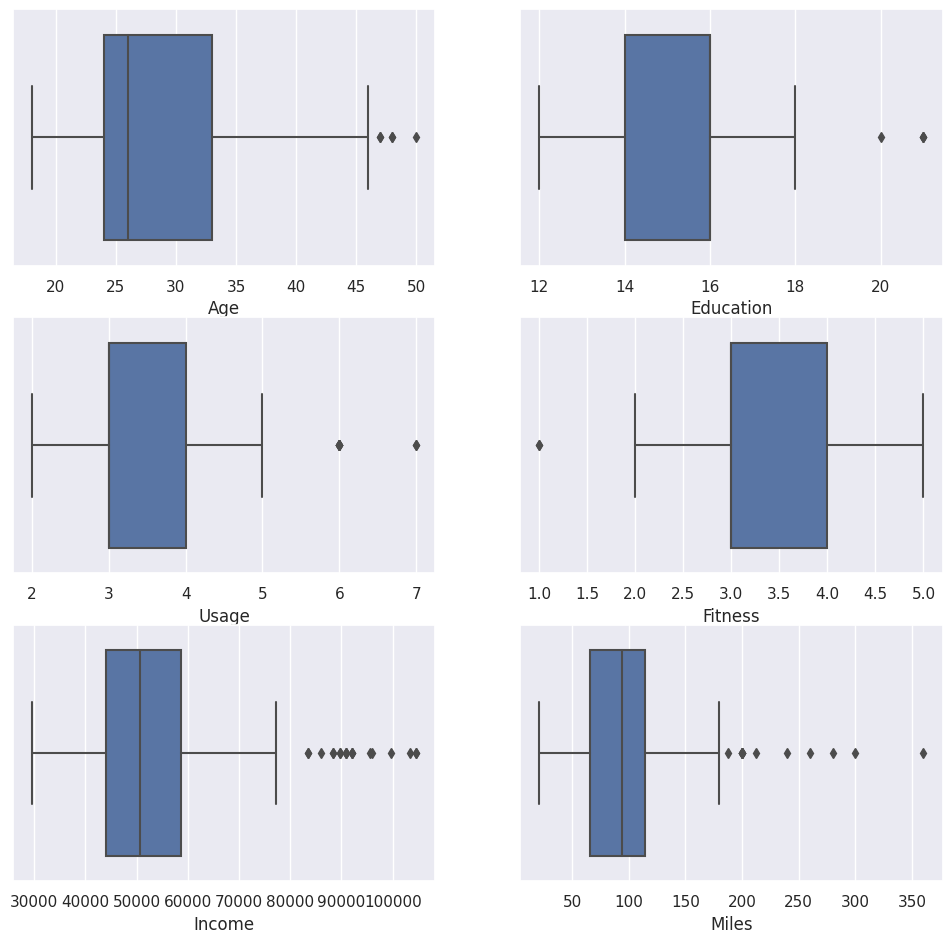

In [ ]:
fig,axis = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x='Usage', orient='h',ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Fitness', orient='h',ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Education', orient='h',ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Age', orient='h',ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Income', orient='h',ax=axis[2,0])
sns.boxplot(data=aerofit_df, x='Miles', orient='h',ax=axis[2,1])
plt.show()

**Observations**

1.   Income and Miles have a lot of outliers.There are lot high income customers and ther are customers whose miles per week is high or they are fitness conscious.
2. There are 3 customers whose age is more than 45 yrs.
1.   There are 2 customers whose education qualification is higher than the rest.







**Count Plot**

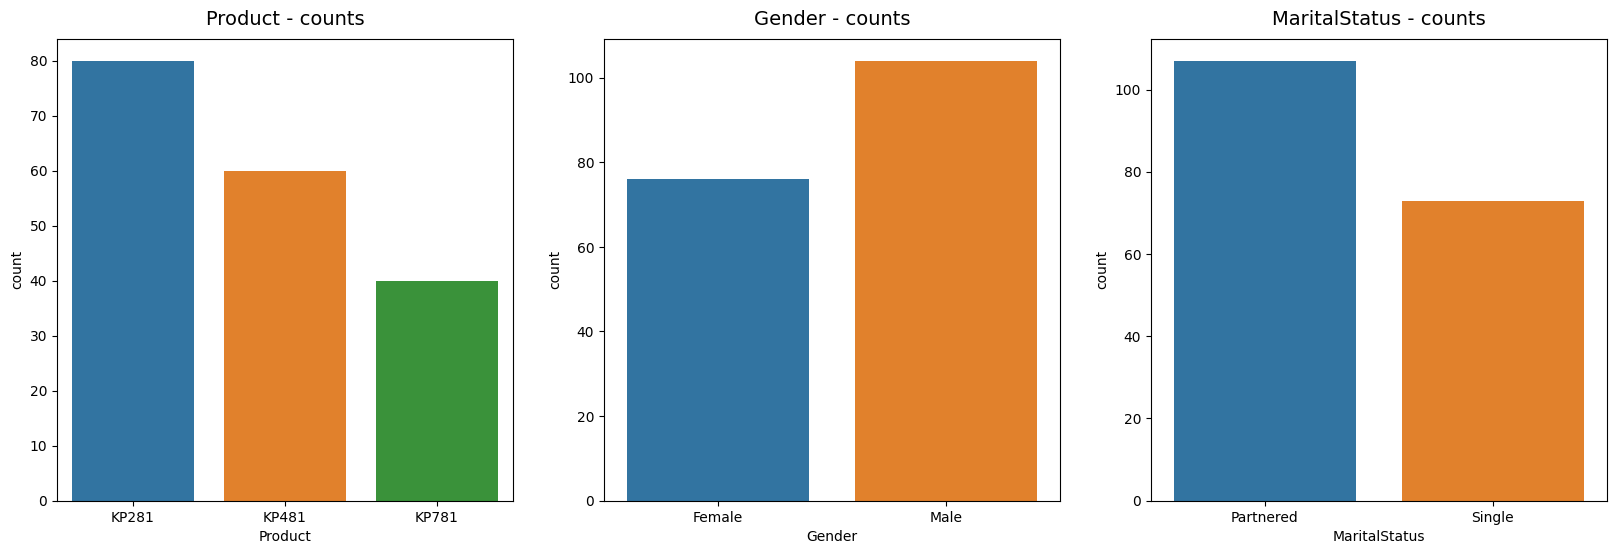

In [ ]:
fig,axis= plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sns.countplot(data=aerofit_df, x='Product',ax=axis[0])
sns.countplot(data=aerofit_df, x='Gender',ax=axis[1])
sns.countplot(data=aerofit_df, x='MaritalStatus',ax=axis[2])

axis[0].set_title("Product - counts", pad=10, fontsize=14)
axis[1].set_title("Gender - counts", pad=10, fontsize=14)
axis[2].set_title("MaritalStatus - counts",pad=10, fontsize=14)

plt.show()

**Observations**

*   KP281 is the most frequent product and best selling product.
*   In Gender, there are more Males who use treadmills than females.
*   The treadmills are more likely to be purchased by partnered people.






**Representing the marginal probability like - what percentage of customers have purchased KP281,KP481, or KP781 in a table.**

In [ ]:
aerofit_df1 = aerofit_df[['Product','Gender','MaritalStatus']].melt()
(aerofit_df1.groupby(['variable','value'])[['value']].count()/len(aerofit_df)).mul(100).round(3).astype(str)+'%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [ ]:
pd.crosstab(aerofit_df['Product'],aerofit_df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


**Observations**


*   **Product**

  *   44.44% of the customers have purchased KP281 product.
  *   33.33% of the customers have purchased KP481 product.

  *   22.22% of the customers have purchased KP781 product

*   **Gender**

  *   57.78% of the customers are Male.


*   **MaritalStatus**
  *   59.44% of the customers are partnered.



### Bivariate Analysis


*   Understanding the distribution of the date for the quantitative attributes:

1.   Age
2.   Education
1.   Usage
2.   Fitness
1.   Income
2.   Miles


**Checking if features like Gender or MaritalStatus have any affect on product purchased**

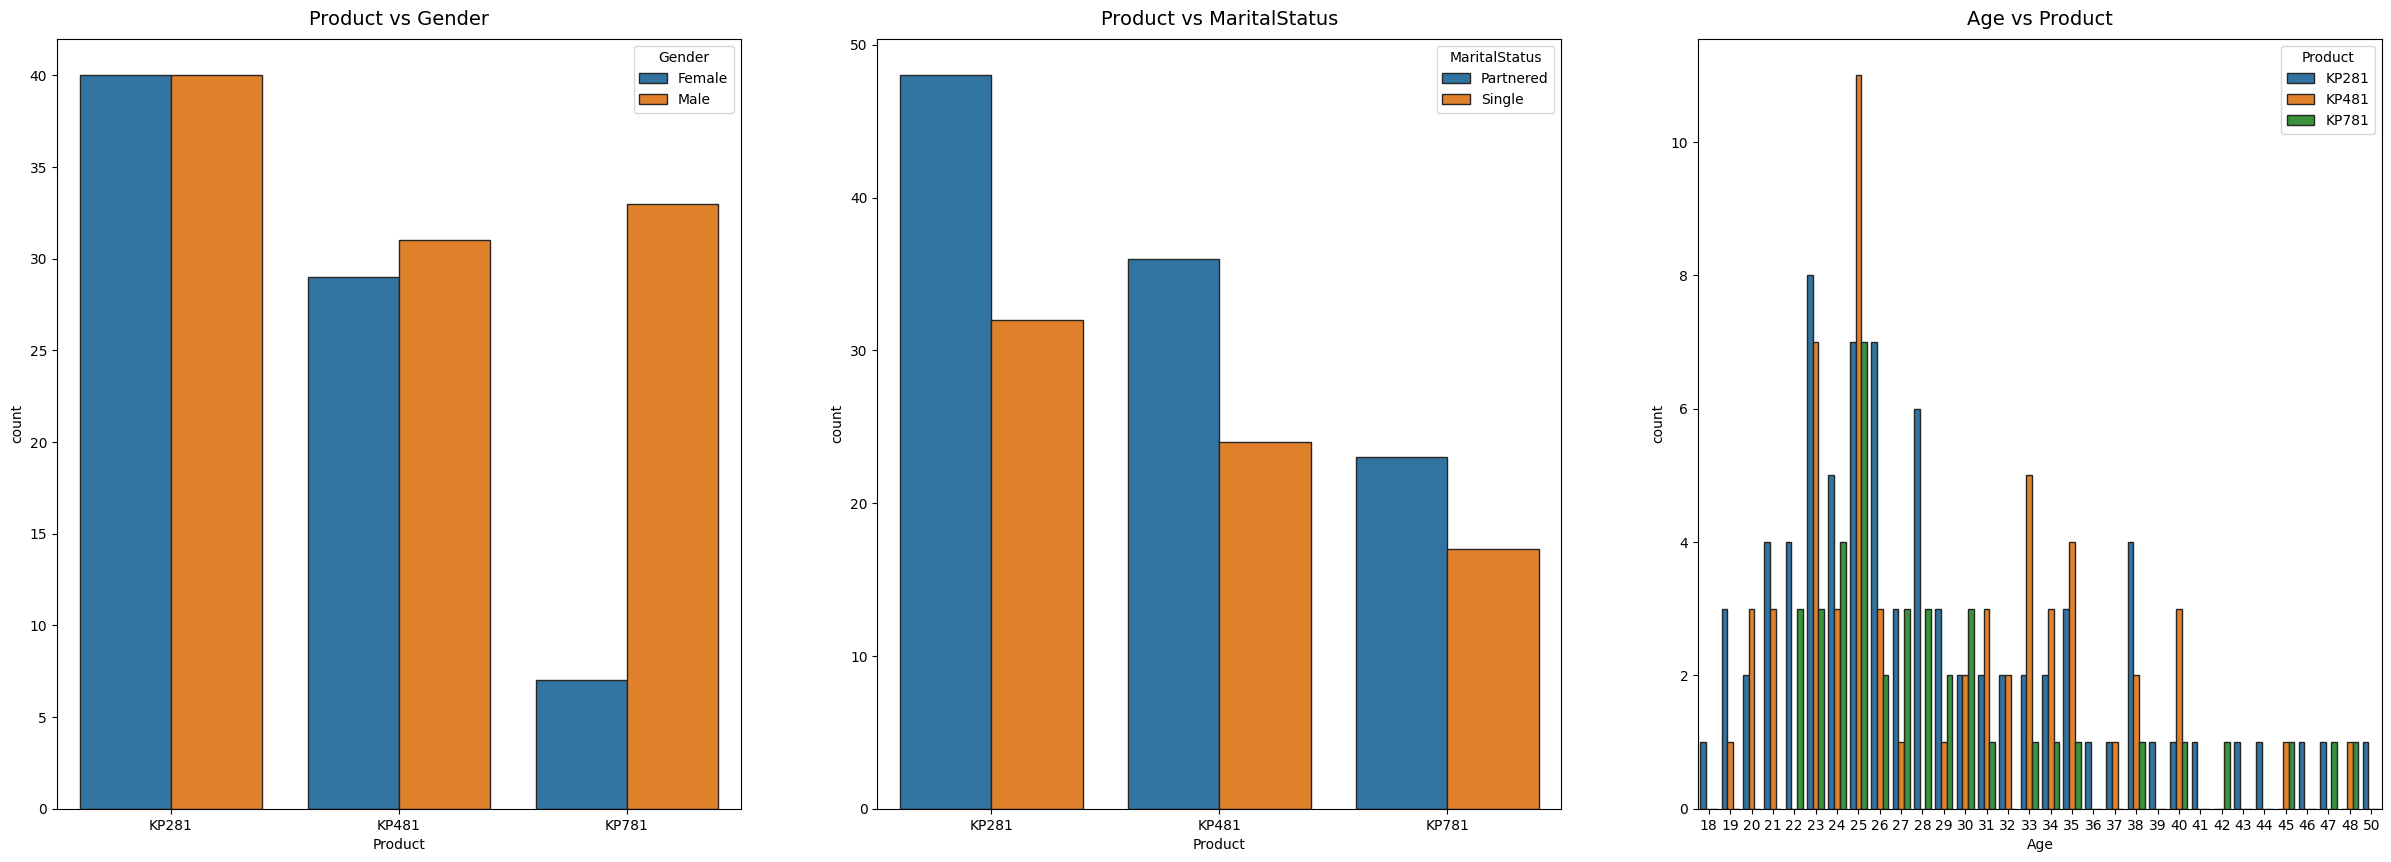

In [ ]:
fig, axis= plt.subplots(nrows=1,ncols=3,figsize=(30,10))
sns.countplot(data=aerofit_df, x='Product', hue='Gender',edgecolor="0.15",ax=axis[0])
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus',edgecolor="0.15",ax=axis[1])
sns.countplot(data=aerofit_df, x='Age', hue='Product',edgecolor='0.15',ax=axis[2])
axis[0].set_title("Product vs Gender", pad=10, fontsize=14)
axis[1].set_title("Product vs MaritalStatus", pad=10,fontsize=14)
axis[2].set_title("Age vs Product", pad=10,fontsize=14)

plt.show()

**Observations**


*   **Product vs Gender**

  *   Equal number of males and females have purchased KP281 product and almost same for the product KP481.
  *   KP781 product is owned mostly by men.


*   **Product vs MaritalStatus**

    *   Customer who is partnered otnumbers the single cutomers across all products.

*   **Age vs Product**

  *   Customers with age 20-35 are more likely to purchase the KP481 product.


**Checking if the following features have any affect on the product purchased**


1.    Age

1.   Education
1.   Usage
2.   Fitness
2.   Income
2.   Miles



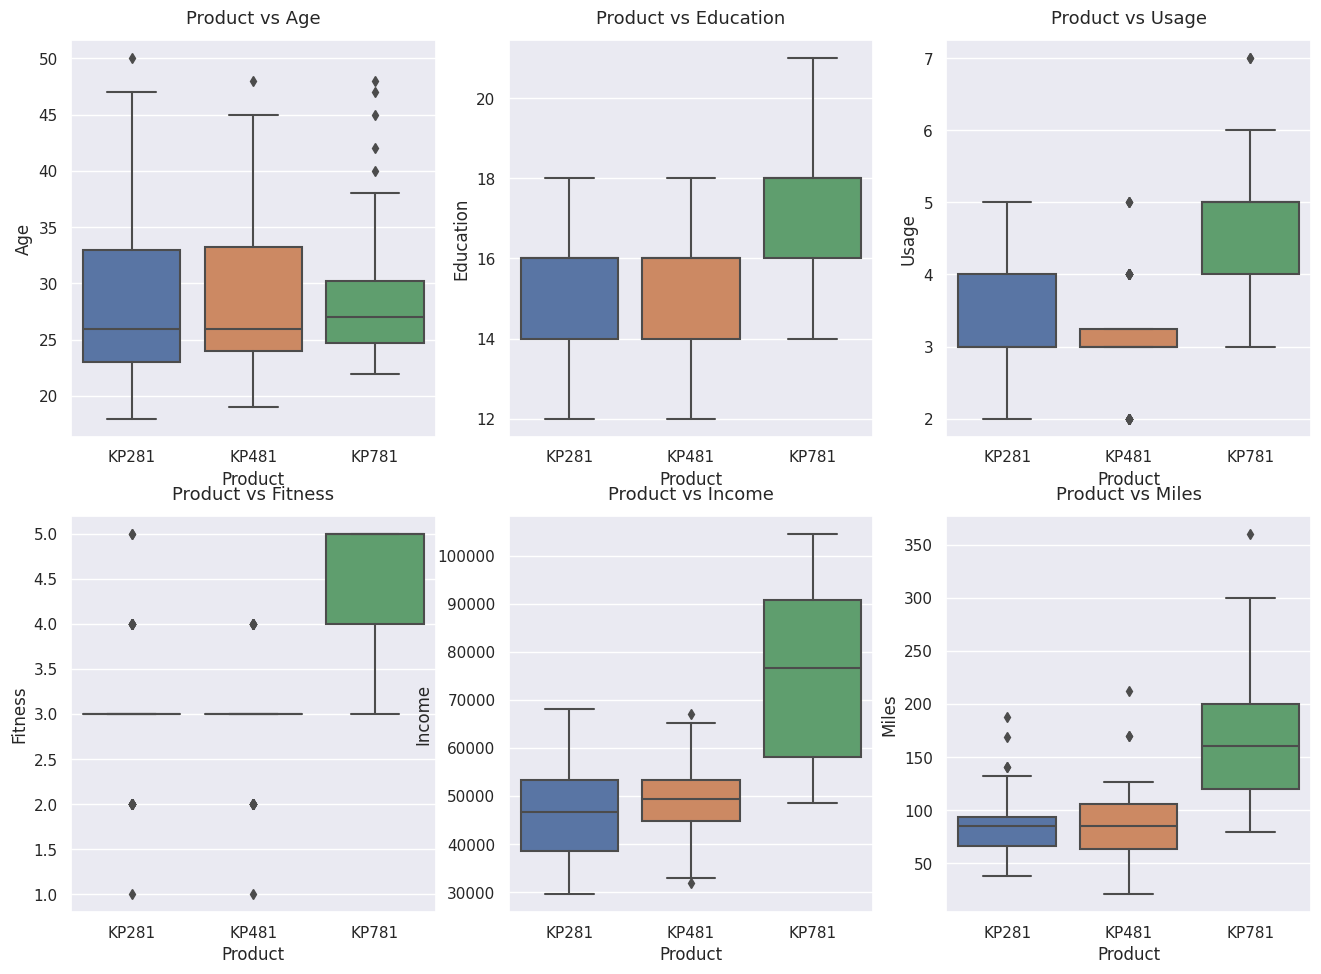

In [ ]:
attributes= ['Age','Education','Usage','Fitness','Income','Miles']
sns.set(color_codes=True)
fig,axis=plt.subplots(nrows=2, ncols=3, figsize=(16,8))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=aerofit_df, x='Product', y=attributes[count],ax=axis[i,j])
    axis[i,j].set_title(f"Product vs {attributes[count]}", pad=12,fontsize=13)
    count+=1

**Observations**


1.   Product vs Age
  *   Customers purchasing products KP281 & KP481 are having same Age median value.
  *   Customers whose age lies between 25-30, are more likely to buy KP781 product.


2.   Product vs Education

  *   Customers whose education is greater than 16 have more chances to purchae KP781 product
  *   While the customers with education less than 16 have equal chances of purchasing KP281 or KP481.

3.   Product vs Usage

  *   Customers who are planning to use the treadmill greater than 4 times a week are more likely to purchase the KP781product.
  *   while the other customers are likely to purchase KP281 or KP481.

4.   Product vs Fitness

  * The more the customer is fit(fitness>3) higher the chances of the cusomer to purchase the KP781 product
5.   Product vs Income

  *   Higher the income of the cusomer(income>=60000), higher the chances of the customer to purchase the KP781 product

6.   Product vs Miles

  *   If the customer expects to run greater than 120 Miles per week, it is more likely that the customer will purchase KP781.






### 3. Correlation




*   understanding the relationship of the data
for the correlated attributes


In [ ]:
aerofit_df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [ ]:
aerofit_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## **Heatmaps**

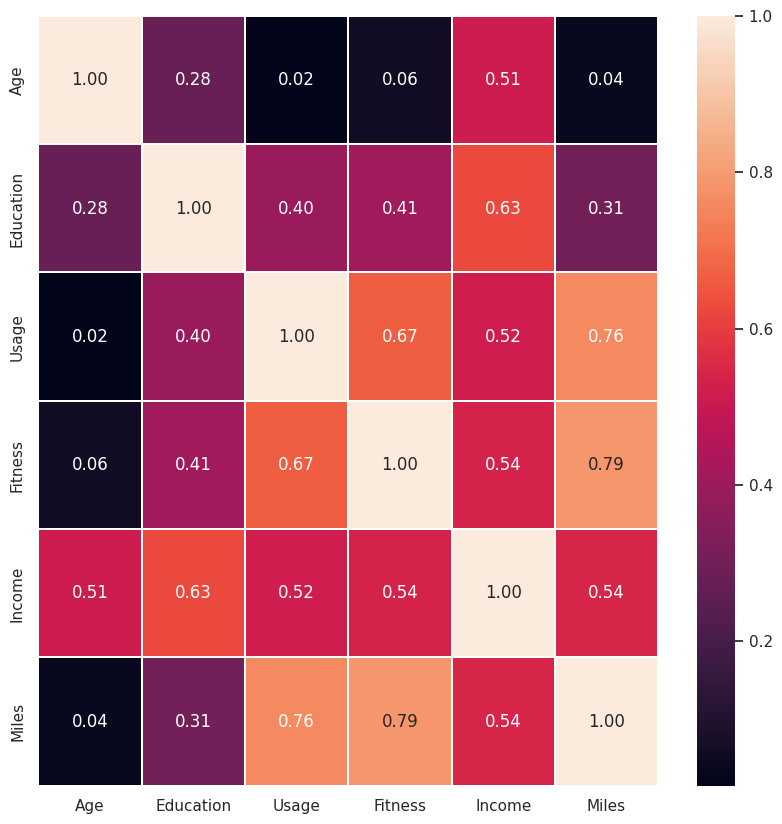

In [ ]:
fig,axis=plt.subplots(figsize=(10,10))
sns.set(color_codes=True)
sns.heatmap(aerofit_df.corr(), ax=axis, annot=True, linewidth=0.05, fmt='0.2f')
plt.show()

**Observations**:

  *   Income and Education shows a strong correlation. High income and highly educated individuals prefer KP781 product which is having advanced features.
  *   Miles & Fitness and Miles & Usage attributes are highly correlated which means if a customers fitness level is high they use more treadmills.

  *   There is no correlation between Usage & Age or Fitness & Age attributes which means age should not be a barrier to use treadmills or specific model of treadmills.




### **Pair Plots**

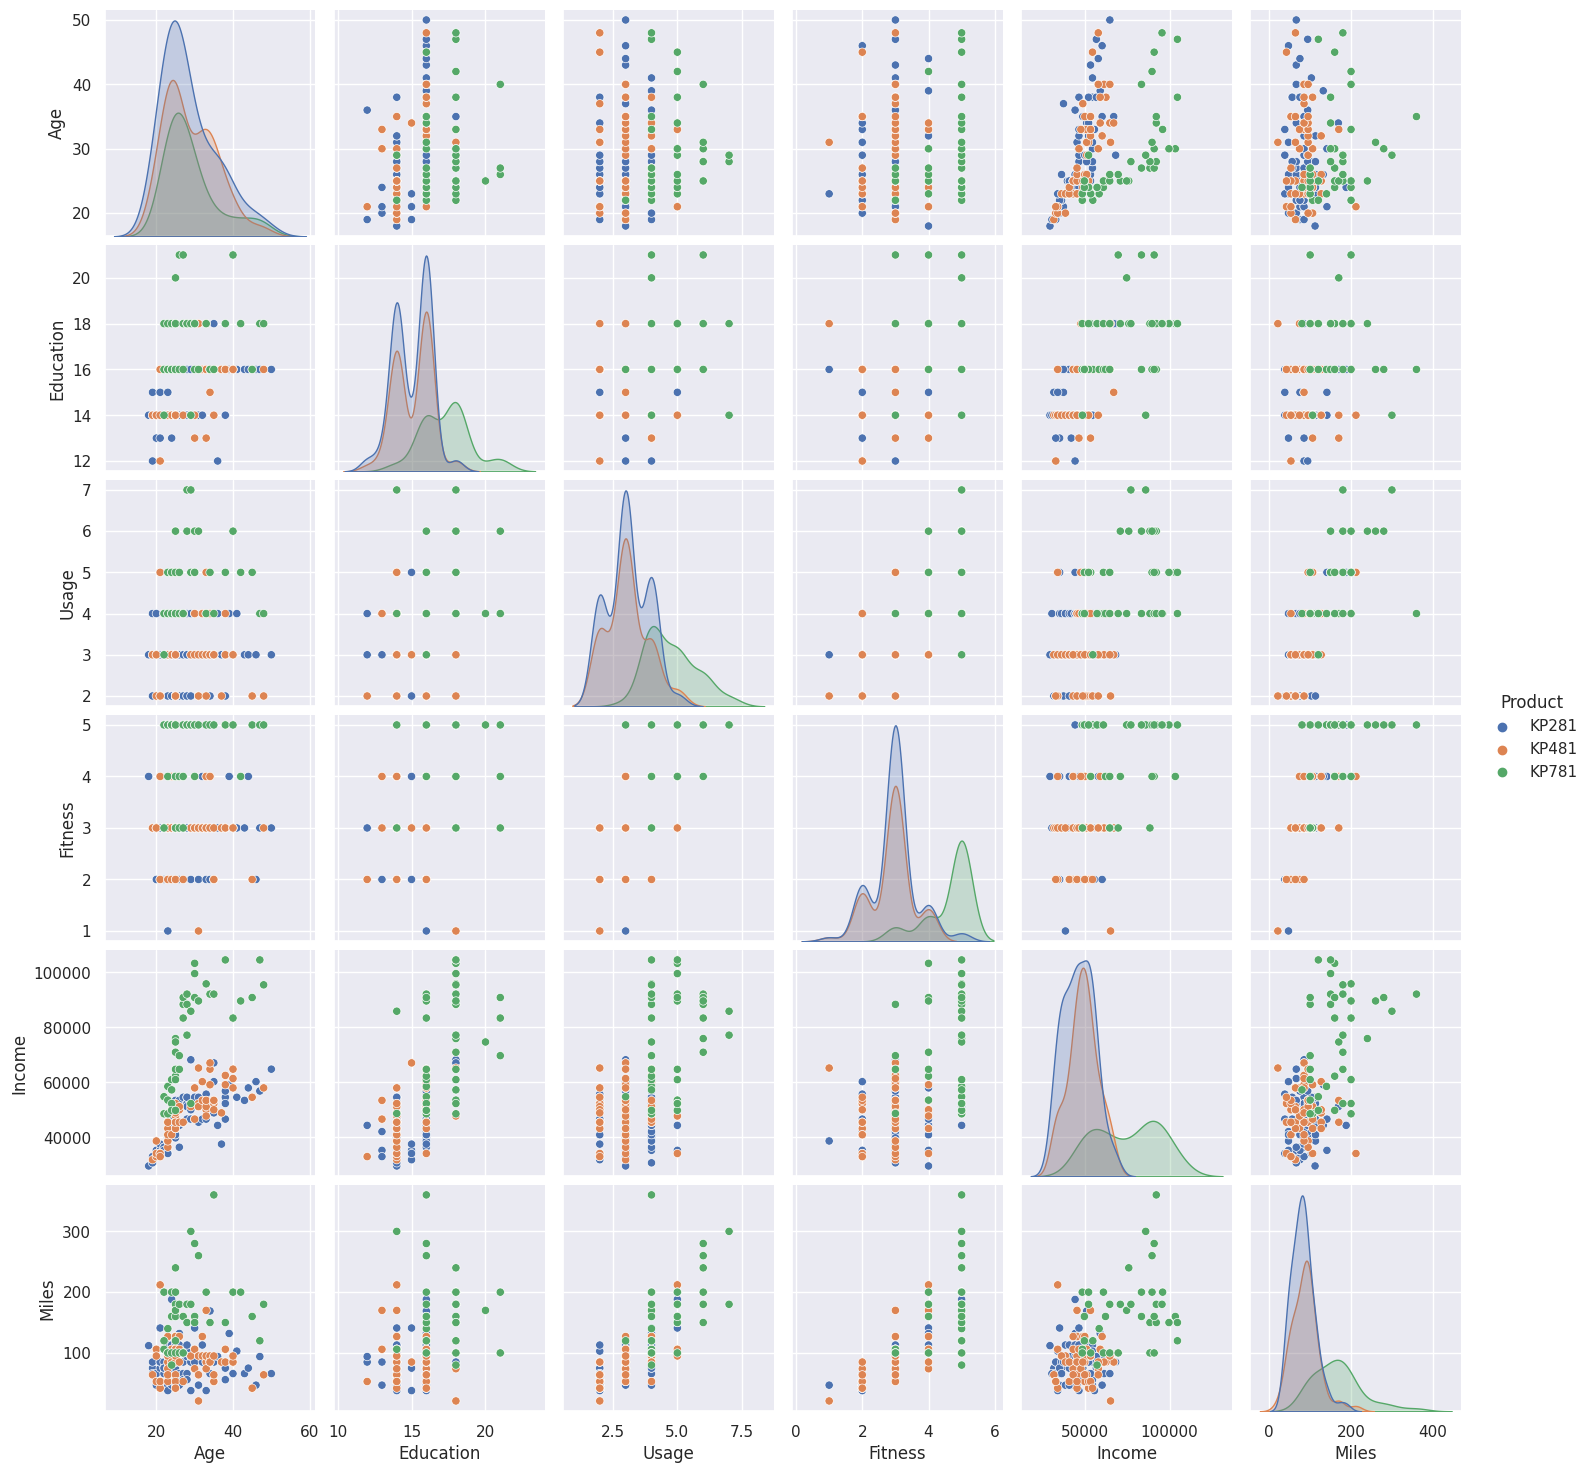

In [ ]:
sns.pairplot(aerofit_df, hue='Product')
plt.show()

### Outlier Detection


  *   Outlier detection using Box plot




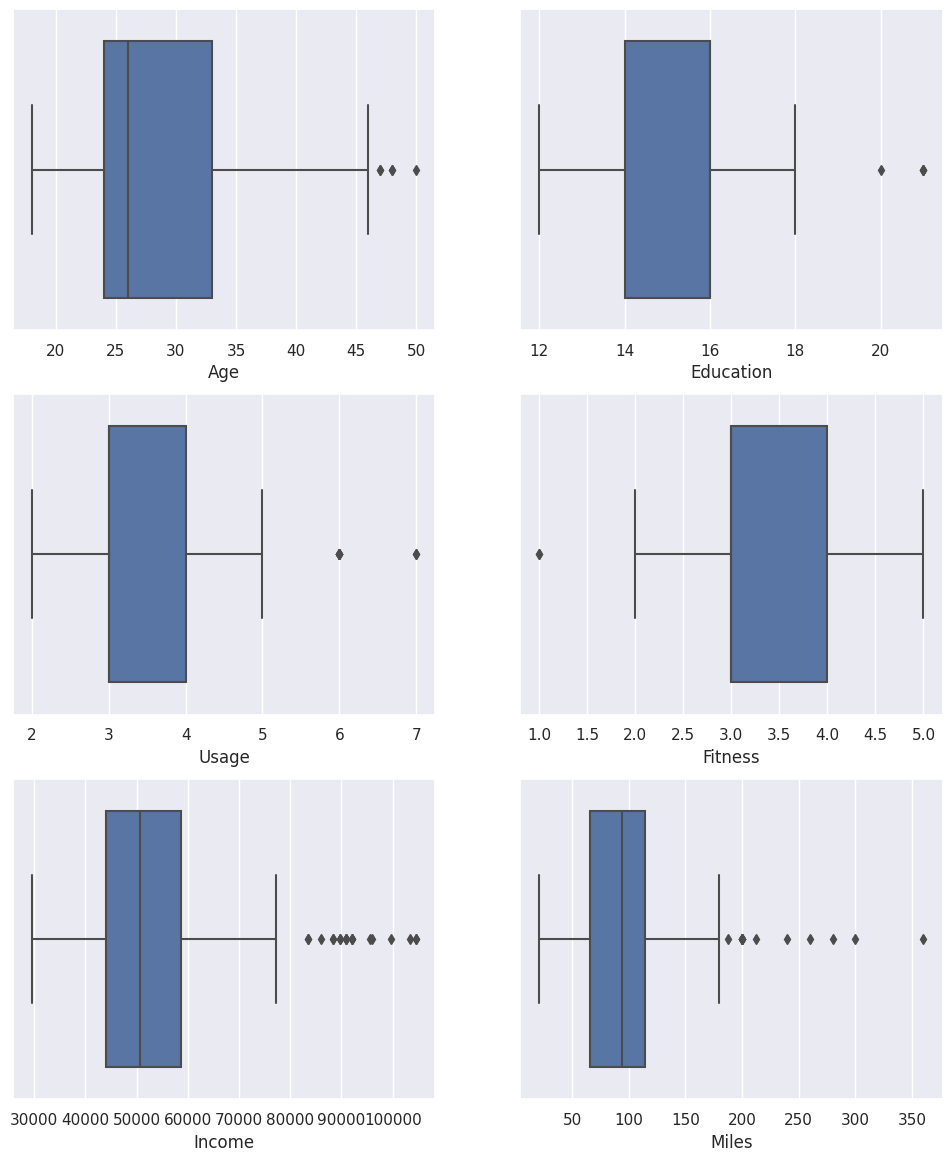

In [ ]:
fig,axis= plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x='Age', orient ='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Education', orient ='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Usage', orient ='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Fitness', orient ='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Income', orient ='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x='Miles', orient ='h', ax=axis[2,1])

plt.show()

**Observation**


  *   Age, Education and Usage are having very few outliers.
  *   While Income and Miles are having more outliers.

  *   Only few people run more than 180 miles per week.






### Outlier Handling for Income Variable:

In [ ]:
aerofit_df1 = aerofit_df.copy()

In [ ]:
# Outlier Treatment : Removing top 5% & bottom 1% of the column outlier values

Q3= aerofit_df1['Income'].quantile(0.75)
Q1=aerofit_df1['Income'].quantile(0.25)
IQR= Q3-Q1
aerofit_df1= aerofit_df1[(aerofit_df1['Income']> Q1-1.5*IQR) & (aerofit_df1['Income']< Q3+ 1.5*IQR)]


### Outlier Handling for Miles variable:

In [ ]:
# Outlier treatment : Removing top 5% & bottom 1% of the column outlier values
Q3= aerofit_df1['Miles'].quantile(0.75)
Q1= aerofit_df1['Miles'].quantile(0.25)
IQR= Q3-Q1
aerofit_df1 = aerofit_df1[(aerofit_df1['Miles']> Q1 - 1.5*IQR) & (aerofit_df1['Miles'] < Q3 + 1.5 * IQR)]

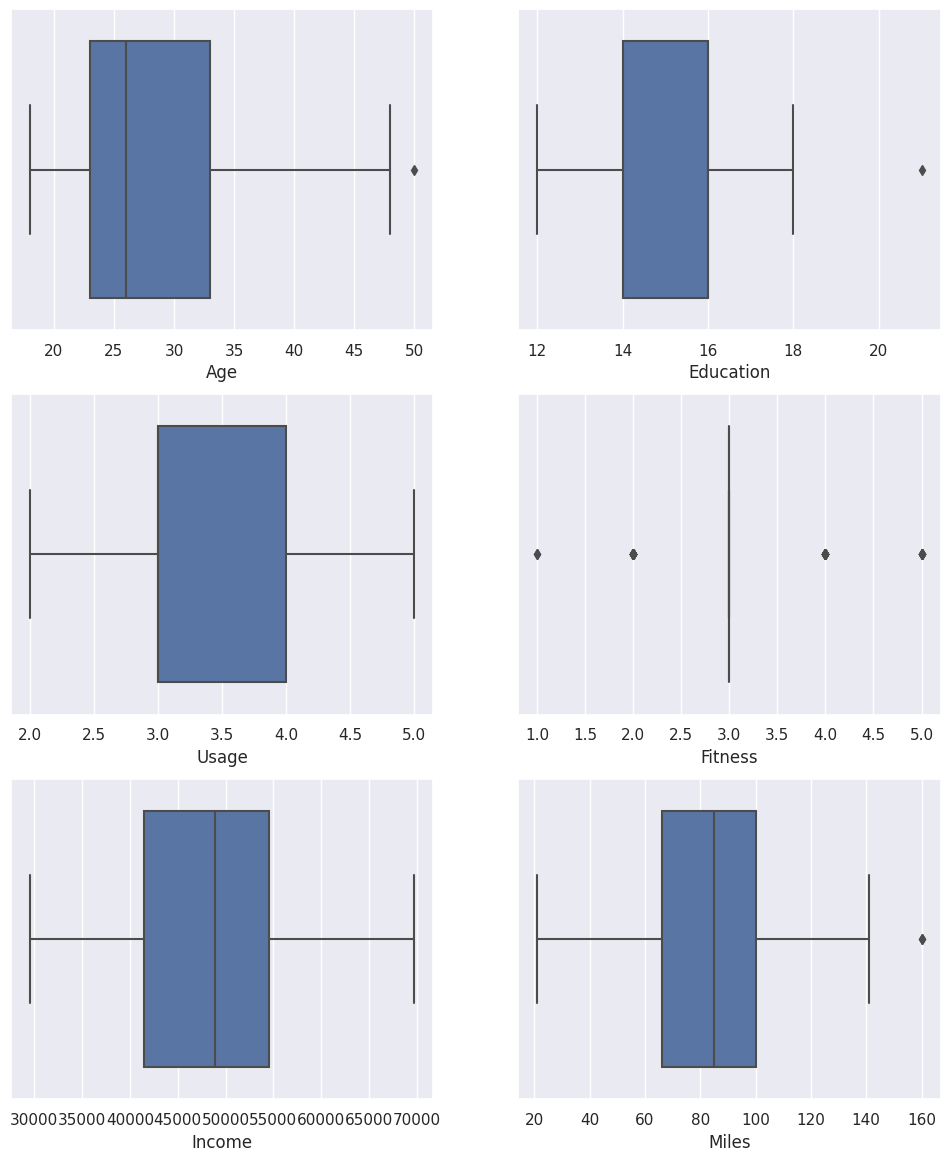

In [ ]:
# Outlier handling using Box plots
fig,axis= plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=aerofit_df1, x='Age', orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df1, x='Education', orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df1, x='Usage', orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df1, x='Fitness', orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df1, x='Income', orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df1, x='Miles', orient='h', ax=axis[2,1])
plt.show()

**Observation**


*   While income and miles are having more outliers in outlier detection.
*   Now in the above plot we have handled the outliers of Income and Miles for the well distribution of data



In [ ]:
# Before removal of outliers
aerofit_df.shape

(180, 9)

In [ ]:
#After removal of outliers
aerofit_df1.shape

(147, 9)

## Computing Marginal & Conditional probabilities

### Marginal Probability

In [ ]:
aerofit_df['Product'].value_counts(normalize=True).mul(100).round(3).astype(str)+'%'

KP281    44.444%
KP481    33.333%
KP781    22.222%
Name: Product, dtype: object

### Conditional Probabilities

What is the probability of a customer based on Gender(Male or Female) buying a certain treadmill product?

In [ ]:
def p_prod_given_gender(gender, print_marginal = False):
  if gender is not 'Female' and gender is not 'Male':
    return "Invalid gender value"

  aerofit_df1= pd.crosstab(index=aerofit_df['Gender'], columns=[aerofit_df['Product']])
  p_281 = aerofit_df1['KP281'][gender]/ aerofit_df1.loc[gender].sum()
  p_481 = aerofit_df1['KP481'][gender]/ aerofit_df1.loc[gender].sum()
  p_781 = aerofit_df1['KP781'][gender]/ aerofit_df1.loc[gender].sum()

  if print_marginal:
    print(f"P(Male):{aerofit_df1.loc['Male'].sum()/len(aerofit_df):.2f}")
    print(f"P(Female):{aerofit_df1.loc['Female'].sum()/len(aerofit_df): .2f}\n")

  print(f"P(KP281/{gender}): {p_281: .2f}")
  print(f"P(KP481/{gender}): {p_481: .2f}")
  print(f"P(KP781/{gender}): {p_781: .2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male):0.58
P(Female): 0.42

P(KP281/Male):  0.38
P(KP481/Male):  0.30
P(KP781/Male):  0.32

P(KP281/Female):  0.53
P(KP481/Female):  0.38
P(KP781/Female):  0.09



**observation**


*   0.32 is the probablity that a Male buys the product KP781
*   0.30 is the probablity that a Male buys the product KP481
*   0.38 is the probablity that a Male buys the product KP281





What is the probability of a customer based on MaritalStatus (Single or Partnered) buying a certain treadmill product?

In [ ]:
def p_prod_given_mstatus(status, print_marginal = False):
  if status is not "Single" and status is not "Partnered":
    return "Invalid marital status value."

  aerofit_df1= pd.crosstab(index=aerofit_df['MaritalStatus'], columns=[aerofit_df['Product']])
  p_281 = aerofit_df1['KP281'][status]/ aerofit_df1.loc[status].sum()
  p_481 = aerofit_df1['KP481'][status]/ aerofit_df1.loc[status].sum()
  p_781 = aerofit_df1['KP781'][status]/ aerofit_df1.loc[status].sum()

  if print_marginal:
    print(f"P(Single):{aerofit_df1.loc['Single'].sum()/len(aerofit_df):.2f}")
    print(f"P(Partnered):{aerofit_df1.loc['Partnered'].sum()/len(aerofit_df): .2f}\n")

  print(f"P(KP281/{status}): {p_281: .2f}")
  print(f"P(KP481/{status}): {p_481: .2f}")
  print(f"P(KP781/{status}): {p_781: .2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single):0.41
P(Partnered): 0.59

P(KP281/Single):  0.44
P(KP481/Single):  0.33
P(KP781/Single):  0.23

P(KP281/Partnered):  0.45
P(KP481/Partnered):  0.34
P(KP781/Partnered):  0.21



**Product-Gender**

In [ ]:
pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']], margins= True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
# percentage of Male customer purchasing a treadmill
Prob = round((104/180),2)
pct= round(Prob*100,2)
pct

58.0

In [ ]:
#Percentage of Female customer purchasing KP781 teadmill
prob = round((7/180),2)
pct=round(prob*100,2)
pct

4.0

In [ ]:
# Percentage of Male customer buying treadmill given that product is KP781
#P(A/B) = P(A,B)/P(B) -- Baye's Theorem
#P(Male/KP781) = P(Male, KP781)/P(KP781)

prob= round((33/40),2)
pct = round(prob*100,2)
pct

82.0

**Observations**


*  82% of Male customers tend to purchase treadmill model KP781 when compared to Female for KP781




### **Product - Age**

In [ ]:
aerofit_df2 = aerofit_df.copy()

# Added 2 new feature from Age
#'AgeCategory' - Teens, 20s,30s and above 40s
#'AgeGroup' - 14-20, 20-30, 30-40, 40-60

bins=[14,20,30,40,60]
labels=['Teens',"20s","30s","Above40s"]
aerofit_df2['AgeGroup']= pd.cut(aerofit_df2['Age'],bins)
aerofit_df2['AgeCategory']= pd.cut(aerofit_df2['Age'], bins, labels=labels)

In [ ]:
aerofit_df2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


In [ ]:
pd.crosstab(index=aerofit_df2['Product'],columns=[aerofit_df2['AgeCategory']],margins=True)

AgeCategory,Teens,20s,30s,Above40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [ ]:
#Percentage of customers with Age between 20s and30s use treadmills

prob=round((110/180),2)
pct=round(prob*100,2)
pct

61.0

In [ ]:
#Teen doesnot prefer to buy KP781
#61% of customer with age group between 20 and 30 purchase tredmills

**Product - Income**

In [ ]:
aerofit_df3= aerofit_df.copy()

# Added 1 new categorial feature based on the Income
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

bins_income = [29000,35000,60000,85000,105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income','High Income']
aerofit_df3['IncomeCategory'] = pd.cut(aerofit_df3['Income'],bins_income,labels = labels_income)

aerofit_df3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income


In [ ]:
pd.crosstab(index=aerofit_df3['Product'],columns=[aerofit_df3['IncomeCategory']],margins=True)

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [ ]:
# Percentage of a high-income customer purchasing a treadmill (Marginal Probability)
# Sum of the treadmill purchased by high income customer by total no. of customers.

prob = round((14/180),2)
pct = round(prob*100,2)
pct

8.0

In [ ]:
# Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)
# Sum of the treadmill with model KP781 purchased by high income customer by total no. of customers.
prob =round(17/180,2)
pct =round(prob*100,2)
pct

9.0

In [ ]:
# Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)
prob = round(17/17,2)
pct = round(prob*100,2)
pct
# Customers having salary more than $ dollar 85,000 buys KP781 (high-end Model).

100.0

**Product- Fitness**

In [ ]:
pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Fitness']],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [ ]:
# Percentage of a customers having fitness level 5
prob =round((31/180),2)
pct =round(prob*100,2)
pct

17.0

In [ ]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
prob =round((29/180),2)
pct =round(prob*100,2)
pct

16.0

In [ ]:
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781
prob =round((29/31),2)
pct =round(prob*100,2)
pct
# 72% of customers with fitness level 5, purchased KP781

94.0

**Product - Marital Status**

In [ ]:
pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
#Percentage of a customers who are partnered using treadmills
prob =round((107/180),2)
pct =round(prob*100,2)
pct
# 59 percent of customer with MaritalStatus as Partnered buy the treadmills.

59.0

### **5. Business Insights based on Non Graphichal and Visual analysis**

**1. Comments on the range of attributes**


*  Attribute Product has 3 categories KP281, KP481 and KP781.
*  Attribute Gender has 2 categories Male and Female.
*  Attribute MaritalStatus has 2 categories Single and Partnered.
*  Attribute Age is between 18 to 50 years and mean age is 29 yrs.

* Attribute Education is between 12 to 21 years of education.75% of people are educated <=16 years.

* Usage of the treadmill lies between 2-7 per week with mean usage as 3.5 times per week.


*   Attribute fitness lies between 1-5 with mean Fitness of people at 3.3 rating
*   Attribute Income lies between $29000 -$104000 approximately with mean value of $53720 which is affected by outliers.
*   Attribute Miles lies between 21 -360 Miles per week with mean value of 103 Miles which is affected by outliers.














**2. Comments on the distribution of the variables and relationship between them.**


*   Mentioned in detail with observation in Visual Analysis- Univariate & Bivariate




**3. Comments for each Unnivariate & Bivariate Plots**


*   Mentioned in detail with observation in Visual Analysis- Univariate & Bivariate




## 6. Actionable Insights & Recommendations:

### Actionable Insights:



*   Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.
*   The majority of treadmill customers fall within the $ 45,000 - $ 80,000 income bracket. 83% of treadmills are bought by individuals with incomes between $ 35,000 and $ 85,000
*   There are only 8% of customers iwth incomes below
 $35000 who buy treadmills.

*   88% of treadmills are purchased by customers aged 20 to 40.
*   Miles and Fitness & Miles and Usage are highly correlated, which means if a person's fitness level is high they will use more treadmills.
*   KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85000
*   With fitness level 4 and 5 the cusomers tend to use high-end treadmills and the average number miles per week is above 150.




### Recommendations


*   KP281 & KP481 are popular with customer income of $ 45,000 - $ 60,000 so the company should target these income people so the probabilty of selling the product increases.
*   Aerofit should conduct market research to determine if it can attract customers with income under $ 35,000 to expand its customer base.
*   KP 781 should be marketed as a premiun model to high income groups and education over 20 years people.
*   KP 781 product should not be marketed to Females as there is less probability that they buy.




